# ⋆. 𐙚 ̊ FANtastic Trio Member  ̊ 𐙚⋆.

*   นางสาวมณิสรา แซ่จัน รหัสนิสิต 66102010151
*   นายฐิติวัฒน์ ฮาบสุวรรณ รหัสนิสิต 66102010238
*   นางสาวเอมี่หลุยส์ บราวน์ รหัสนิสิต 66102010572

# Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation & Import Libraries

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.2 MB/s eta 0:00:00


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from matplotlib import pyplot as plt

# Load Person Dataset

โหลดชุดข้อมูลจาก Github: [Person Dataset](https://github.com/PSLeon24/AI_Exercise_Pose_Feedback/tree/main/yolov5_onlyPerson/person)

In [ ]:
!sudo apt install git-lfs
!git clone --depth 1 --filter=blob:none --sparse https://github.com/PSLeon24/AI_Exercise_Pose_Feedback.git
%cd AI_Exercise_Pose_Feedback
!git sparse-checkout set yolov5_onlyPerson

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Cloning into 'AI_Exercise_Pose_Feedback'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 3), reused 17 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 261.12 KiB | 6.70 MiB/s, done.
Resolving deltas: 100% (3/3), done.
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 2), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 6.23 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/AI_Exercise_Pose_Feedback
remote: Enumerating objects: 10566, done.
remote: Counting objects: 100% (10566/10566), done

In [ ]:
dataset_root = '/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson'

## Create data.yaml

In [ ]:
import yaml
import os
from pathlib import Path

def create_data_yaml(dataset_root):
    """
    สร้างไฟล์ data.yaml สำหรับ YOLO (รองรับทั้ง detect และ pose)

    Parameters:
        dataset_root (str): path ของโฟลเดอร์ dataset
    """
    dataset_root = Path(dataset_root).resolve()

    # สร้าง dict สำหรับ config
    data_config = {
        'path': str(dataset_root),
        'train': '/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/images/train',
        'val': '/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/images/val',
        'test': '/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/images/test',
        'names': {
            0: 'person'
        }
    }

    # เขียนไฟล์ data.yaml
    yaml_path = dataset_root / 'data.yaml'
    with open(yaml_path, 'w') as f:
        yaml.dump(data_config, f, sort_keys=False, allow_unicode=True)

    print(f"✅ Created data.yaml at: {yaml_path}")
    return yaml_path

yaml_path = create_data_yaml('/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person')

✅ Created data.yaml at: /content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/data.yaml


# ˖⋆˚✿˖° Training YOLOv5

In [ ]:
# ต้องอยู่ในโฟลเดอร์ yolov5
%cd /content/yolov5

# เทรน
!python train.py \
    --img 640 \
    --batch-size 64 \
    --epochs 100 \
    --data dataset.yaml \
    --weights yolov5s.pt \
    --device 0 \
    --project person_detection \
    --name exp1




Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      70/99        13G    0.02252    0.01529          0        168        640:  84% 70/83 [01:36<00:16,  1.26s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      70/99        13G     0.0224    0.01528          0        158        640:  86% 71/83 [01:38<00:16,  1.41s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      70/99        13G    0.02249     0.0153          0        183        640:  87% 72/83 [01:39<00:13,  1.22s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):


## ᯓᰔ Result from a self-trained model

/content/yolov5
ตรวจจับคน - Person Detection
อัปโหลดรูปภาพ



Saving person_537.jpg to person_537.jpg

รูปต้นฉบับ: person_537.jpg


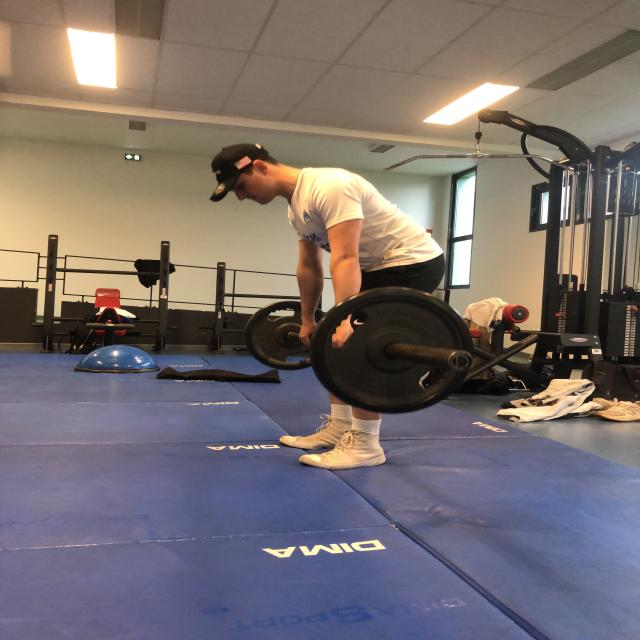


กำลังตรวจจับคน...

detect: weights=['yolov5s.pt'], source=person_537.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=person, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-447-ge76591cb Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/person_537.jpg: 640x640 1 person, 12.2ms
Speed: 0.7ms pre-process, 12.2ms inference, 131.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/person
9 labels saved to runs/detect/person/labels
ผลลัพธ์:


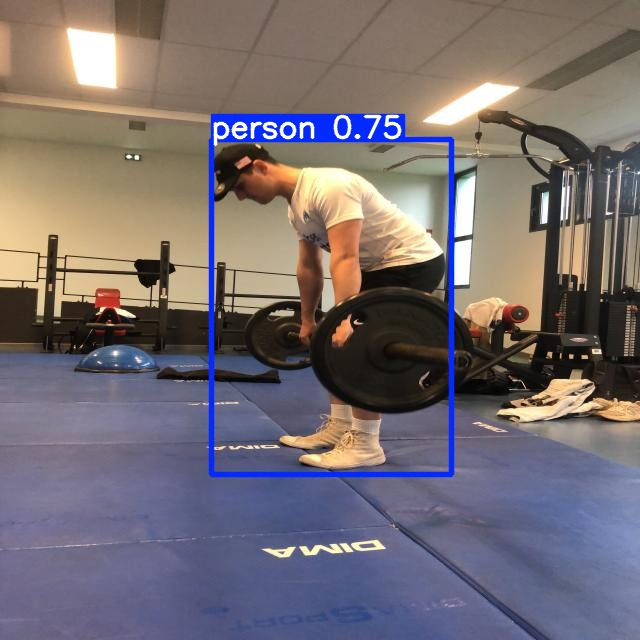


ไม่พบคน



In [ ]:
# ========================================
# YOLOv5 Person Detection - เวอร์ชันสั้น
# ========================================

import os
from IPython.display import Image, display
from google.colab import files

# ติดตั้ง YOLOv5
if not os.path.exists('/content/yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    %cd /content/yolov5
    !pip install -r requirements.txt -q
else:
    %cd /content/yolov5

# อัปโหลดรูป
print("="*70)
print("ตรวจจับคน - Person Detection")
print("="*70)
print("อัปโหลดรูปภาพ\n")

uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        # บันทึกไฟล์
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        # แสดงรูปต้นฉบับ
        print(f"\nรูปต้นฉบับ: {filename}")
        display(Image(filename=filename, width=600))

        # ตรวจจับคน
        print("\nกำลังตรวจจับคน...\n")

        !python detect.py --weights yolov5s.pt --img 640 --conf 0.4 \
            --source "{filename}" --classes 0 --save-txt --project runs/detect \
            --name person --exist-ok

        # แสดงผลลัพธ์
        result = f'runs/detect/person/{filename}'
        label = f'runs/detect/person/labels/{os.path.splitext(filename)}.txt'

        if os.path.exists(result):
            print("ผลลัพธ์:")
            display(Image(filename=result, width=600))

            # นับคน
            if os.path.exists(label):
                with open(label, 'r') as f:
                    count = len(f.readlines())
                    print(f"\nตรวจพบ: {count} คน")

                    # แสดงรายละเอียด
                    f.seek(0)
                    for i, line in enumerate(f, 1):
                        conf = float(line.split()) if len(line.split()) > 5 else 0
                        print(f"   คนที่ {i}: {conf*100:.1f}% มั่นใจ")
            else:
                print("\nไม่พบคน")

        print("\n" + "="*70)
else:
    print("ไม่มีไฟล์")

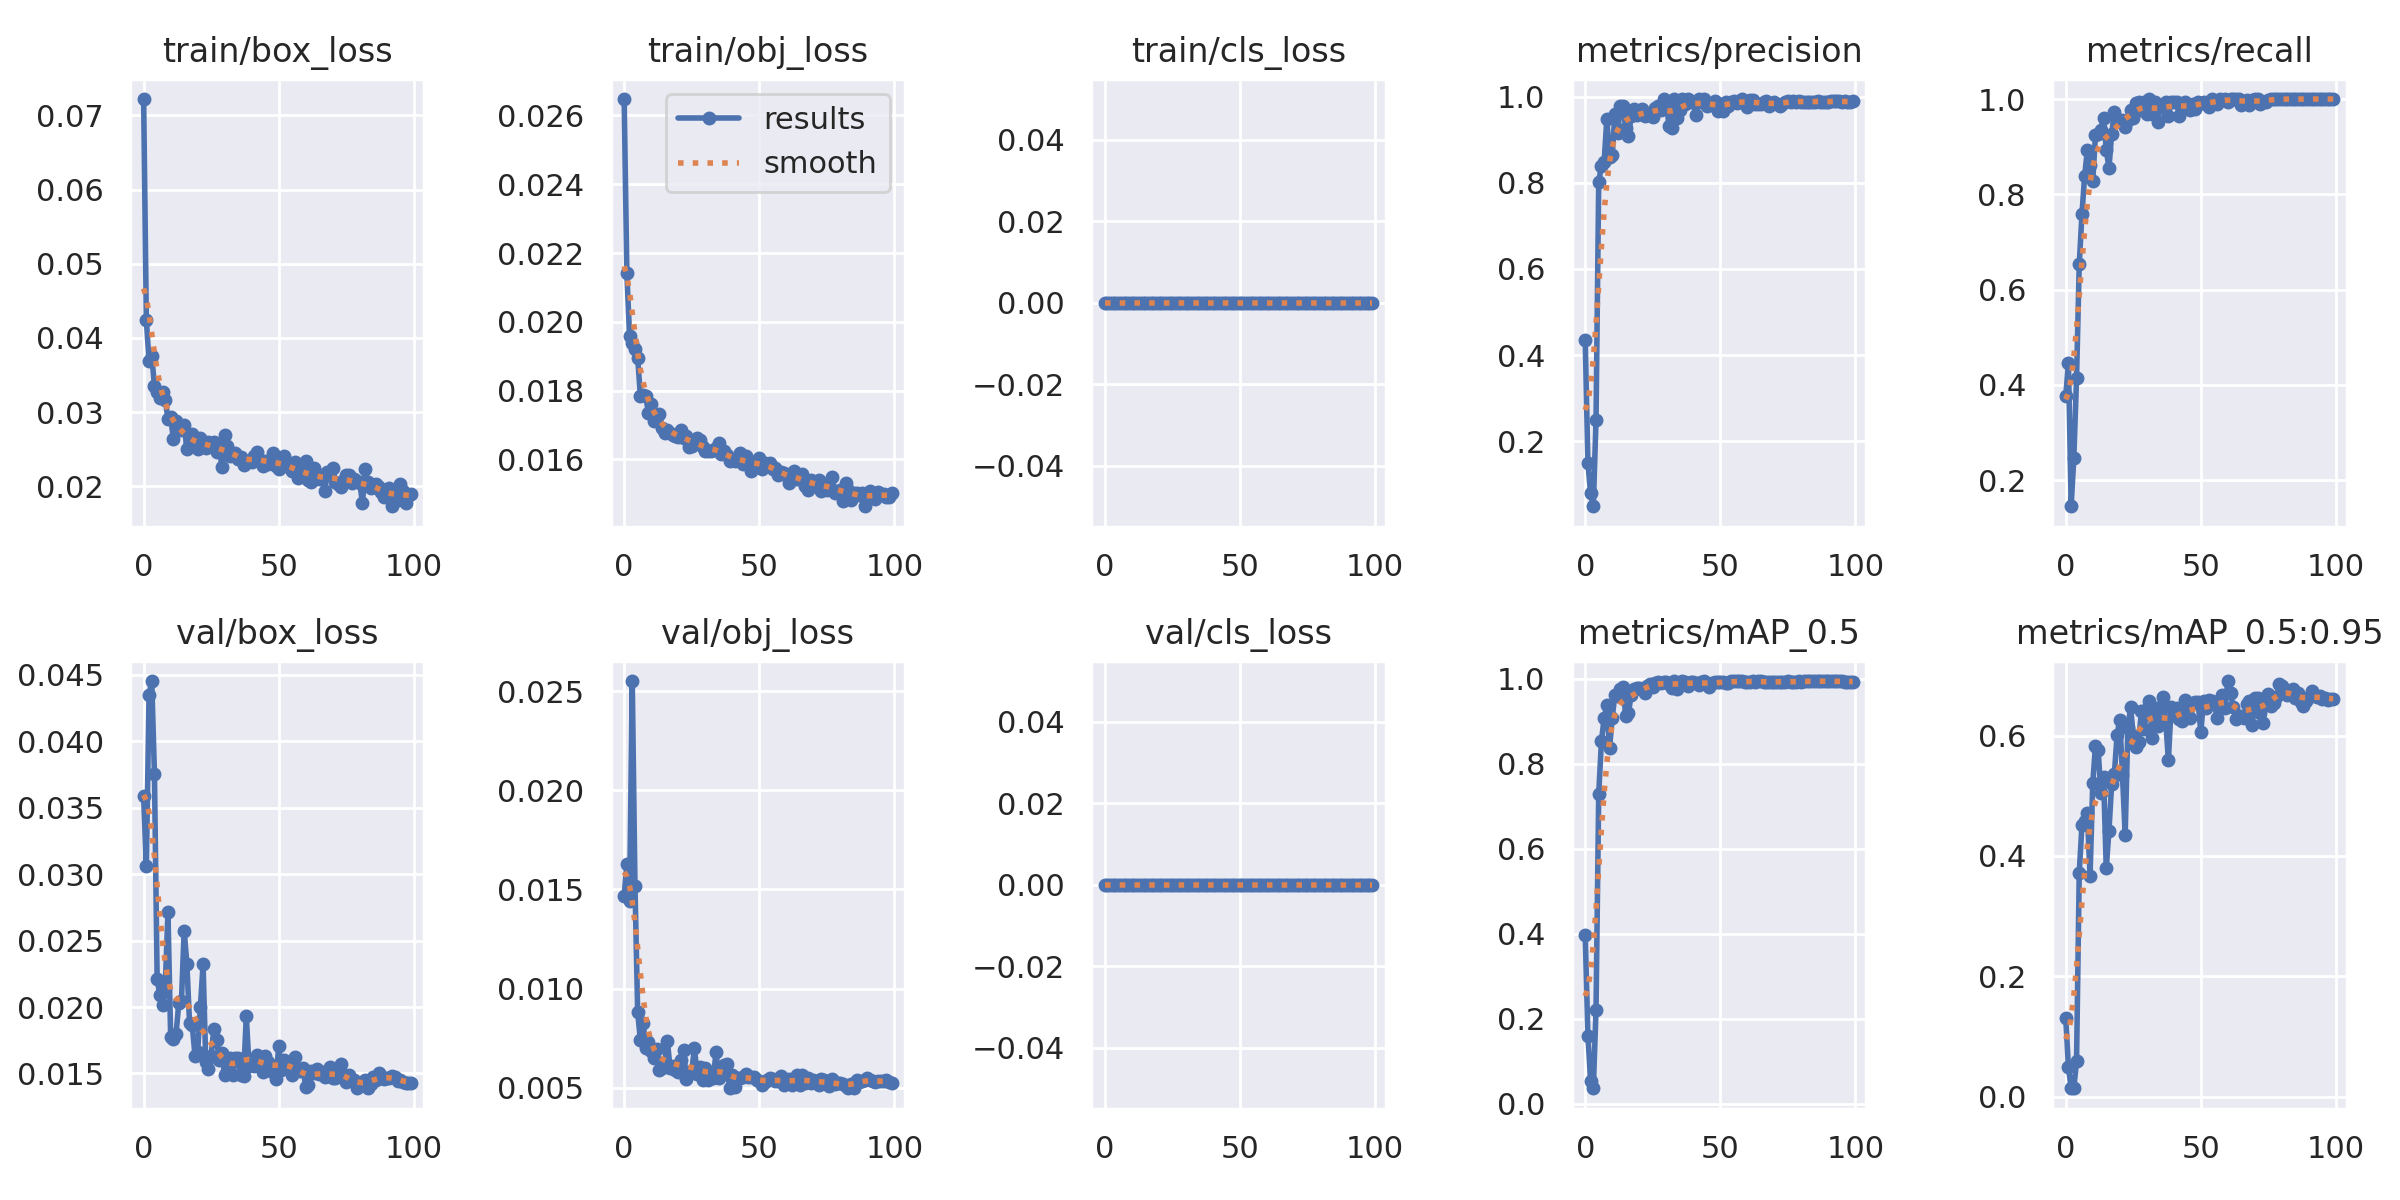

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/person_detection/exp1/results.png')

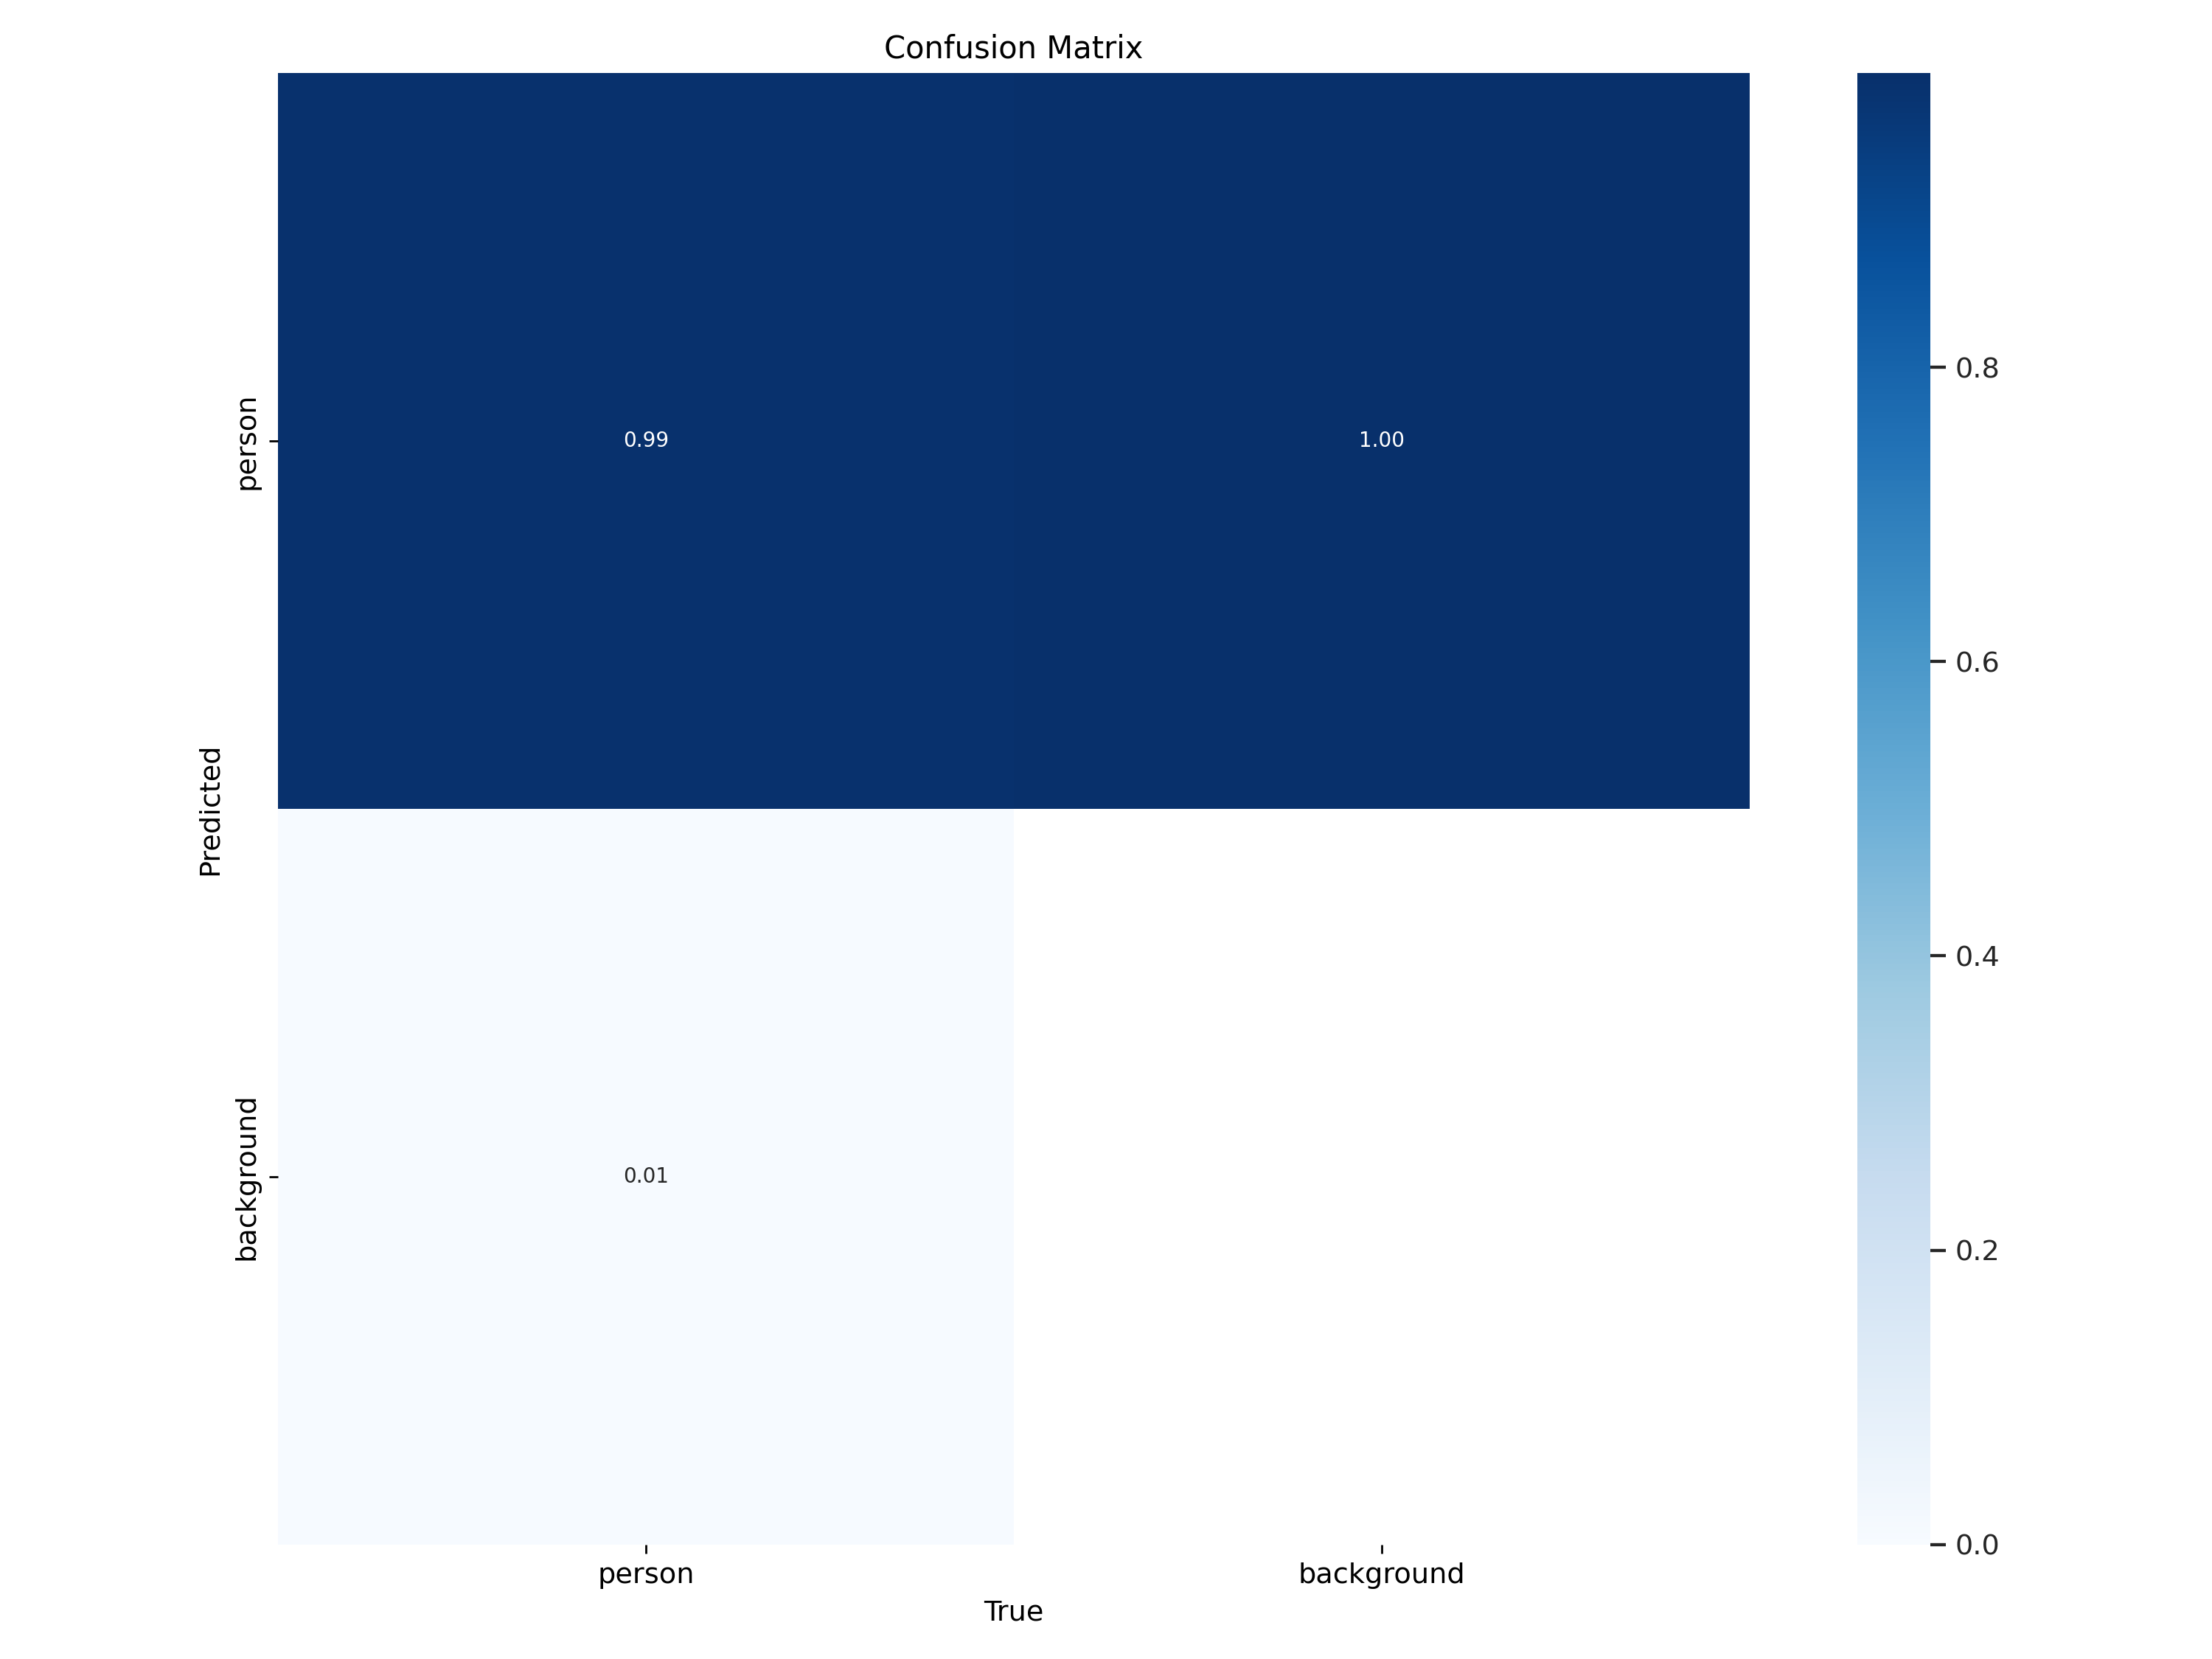

In [ ]:
Image(filename='/content/drive/MyDrive/person_detection/exp1/confusion_matrix.png')

## ᯓᰔ Result from an existing person class

/content/yolov5
ตรวจจับคน - Person Detection
อัปโหลดรูปภาพ



Saving person_537.jpg to person_537.jpg

รูปต้นฉบับ: person_537.jpg


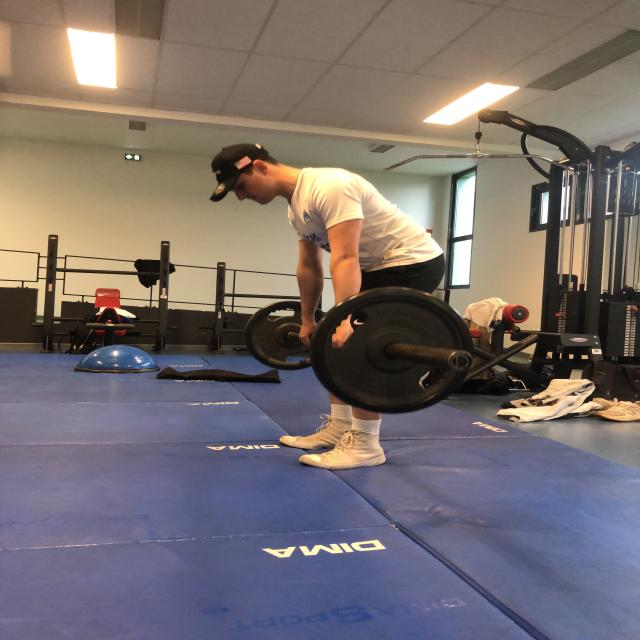


กำลังตรวจจับคน...

detect: weights=['yolov5s.pt'], source=person_537.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=person, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-447-ge76591cb Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/person_537.jpg: 640x640 1 person, 12.2ms
Speed: 0.7ms pre-process, 12.2ms inference, 131.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/person
9 labels saved to runs/detect/person/labels
ผลลัพธ์:


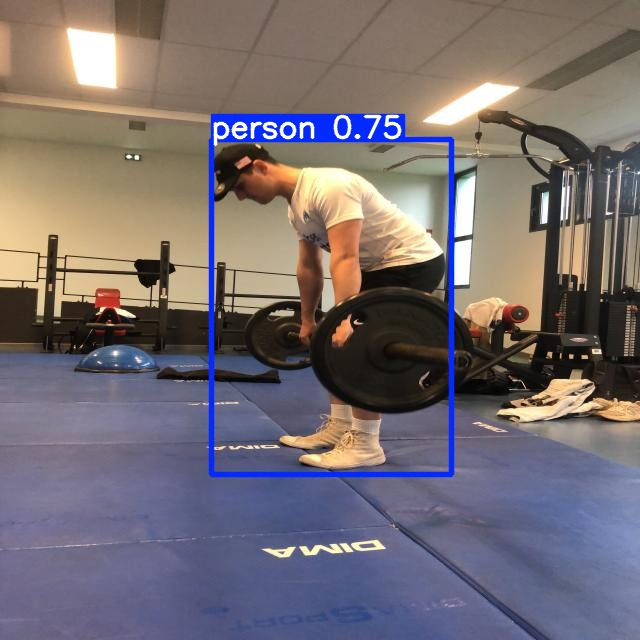


ไม่พบคน



In [ ]:
# YOLOv5 Person Detection - เวอร์ชันสั้น
import os
from IPython.display import Image, display
from google.colab import files

# ติดตั้ง YOLOv5
if not os.path.exists('/content/yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    %cd /content/yolov5
    !pip install -r requirements.txt -q
else:
    %cd /content/yolov5

# อัปโหลดรูป
print("="*70)
print("ตรวจจับคน - Person Detection")
print("="*70)
print("อัปโหลดรูปภาพ\n")

uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        # บันทึกไฟล์
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        # แสดงรูปต้นฉบับ
        print(f"\nรูปต้นฉบับ: {filename}")
        display(Image(filename=filename, width=600))

        # ตรวจจับคน
        print("\nกำลังตรวจจับคน...\n")

        !python detect.py --weights yolov5s.pt --img 640 --conf 0.4 \
            --source "{filename}" --classes 0 --save-txt --project runs/detect \
            --name person --exist-ok

        # แสดงผลลัพธ์
        result = f'runs/detect/person/{filename}'
        label = f'runs/detect/person/labels/{os.path.splitext(filename)}.txt'

        if os.path.exists(result):
            print("ผลลัพธ์:")
            display(Image(filename=result, width=600))

            # นับคน
            if os.path.exists(label):
                with open(label, 'r') as f:
                    count = len(f.readlines())
                    print(f"\nตรวจพบ: {count} คน")

                    # แสดงรายละเอียด
                    f.seek(0)
                    for i, line in enumerate(f, 1):
                        conf = float(line.split()) if len(line.split()) > 5 else 0
                        print(f"   คนที่ {i}: {conf*100:.1f}% มั่นใจ")
            else:
                print("\nไม่พบคน")

        print("\n" + "="*70)
else:
    print("ไม่มีไฟล์")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-11-15 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/comm

Approximate FPS: 69.35


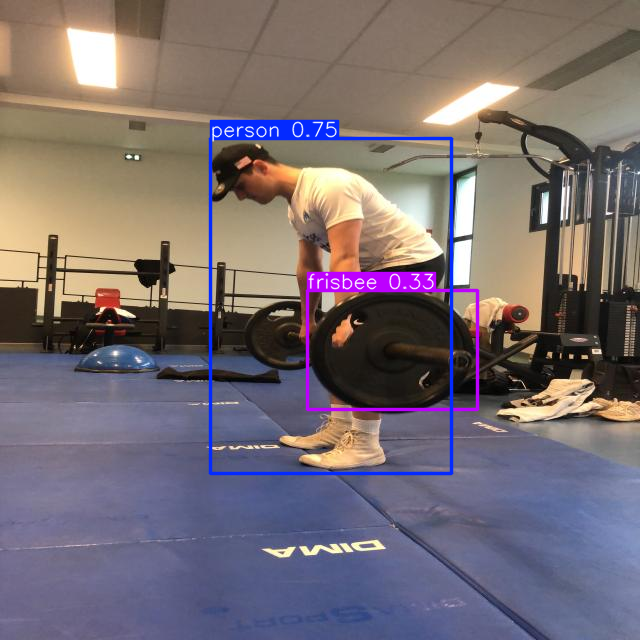

In [ ]:
import torch
import time

# โหลดโมเดล YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()

# ตัวอย่างรูป
img_path = "/content/yolov5/images/val/person_537.jpg"
img = [img_path]  # YOLOv5 รองรับ list ของ path หรือ numpy array

# warm-up GPU
for _ in range(5):
    _ = model(img)

# วัดเวลา inference
N = 100
start = time.time()
for _ in range(N):
    results = model(img)  # inference
end = time.time()

fps = N / (end - start)
print(f"Approximate FPS: {fps:.2f}")

# ดูผลลัพธ์ของตัวอย่าง 1 ภาพ
results.print()       # แสดงสรุป
results.show()        # เปิดรูปพร้อม bounding box


## Compare

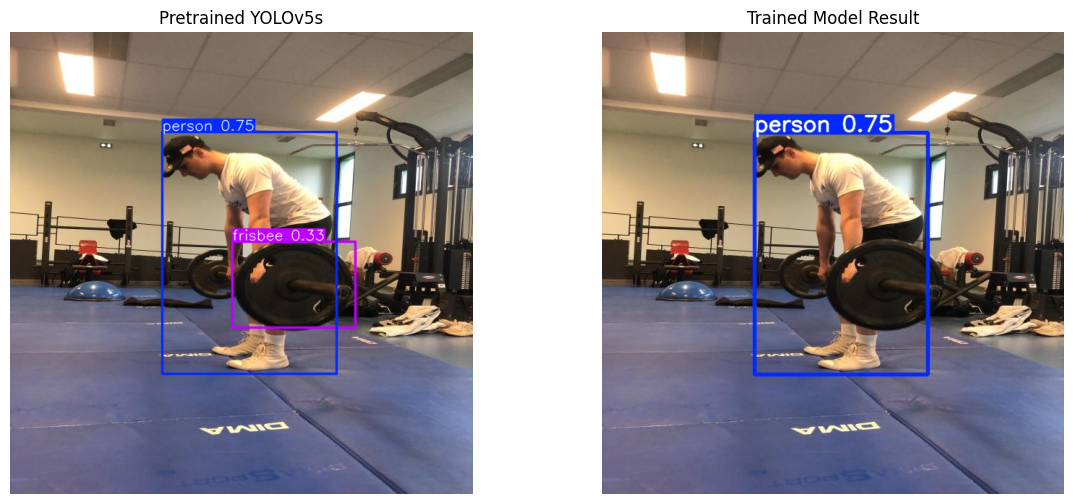

In [ ]:
# path รูป
img1_path = "/content/drive/MyDrive/YOLOv5s/pretrained.png"
img2_path = "/content/drive/MyDrive/YOLOv5s/trained.jpg"

# โหลดรูป (OpenCV โหลดเป็น BGR → ต้องแปลงเป็น RGB)
img1 = cv2.imread(img1_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(img2_path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# แสดงเปรียบเทียบ
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Pretrained YOLOv5s")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Trained Model Result")
plt.axis('off')

plt.show()


# ˖⋆˚✿˖° Training YOLOv8

In [ ]:
!yolo detect train data=/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/data.yaml \
    model=yolov8s.pt epochs=100 project=/content/drive/MyDrive/yolo_results name=pose_training

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

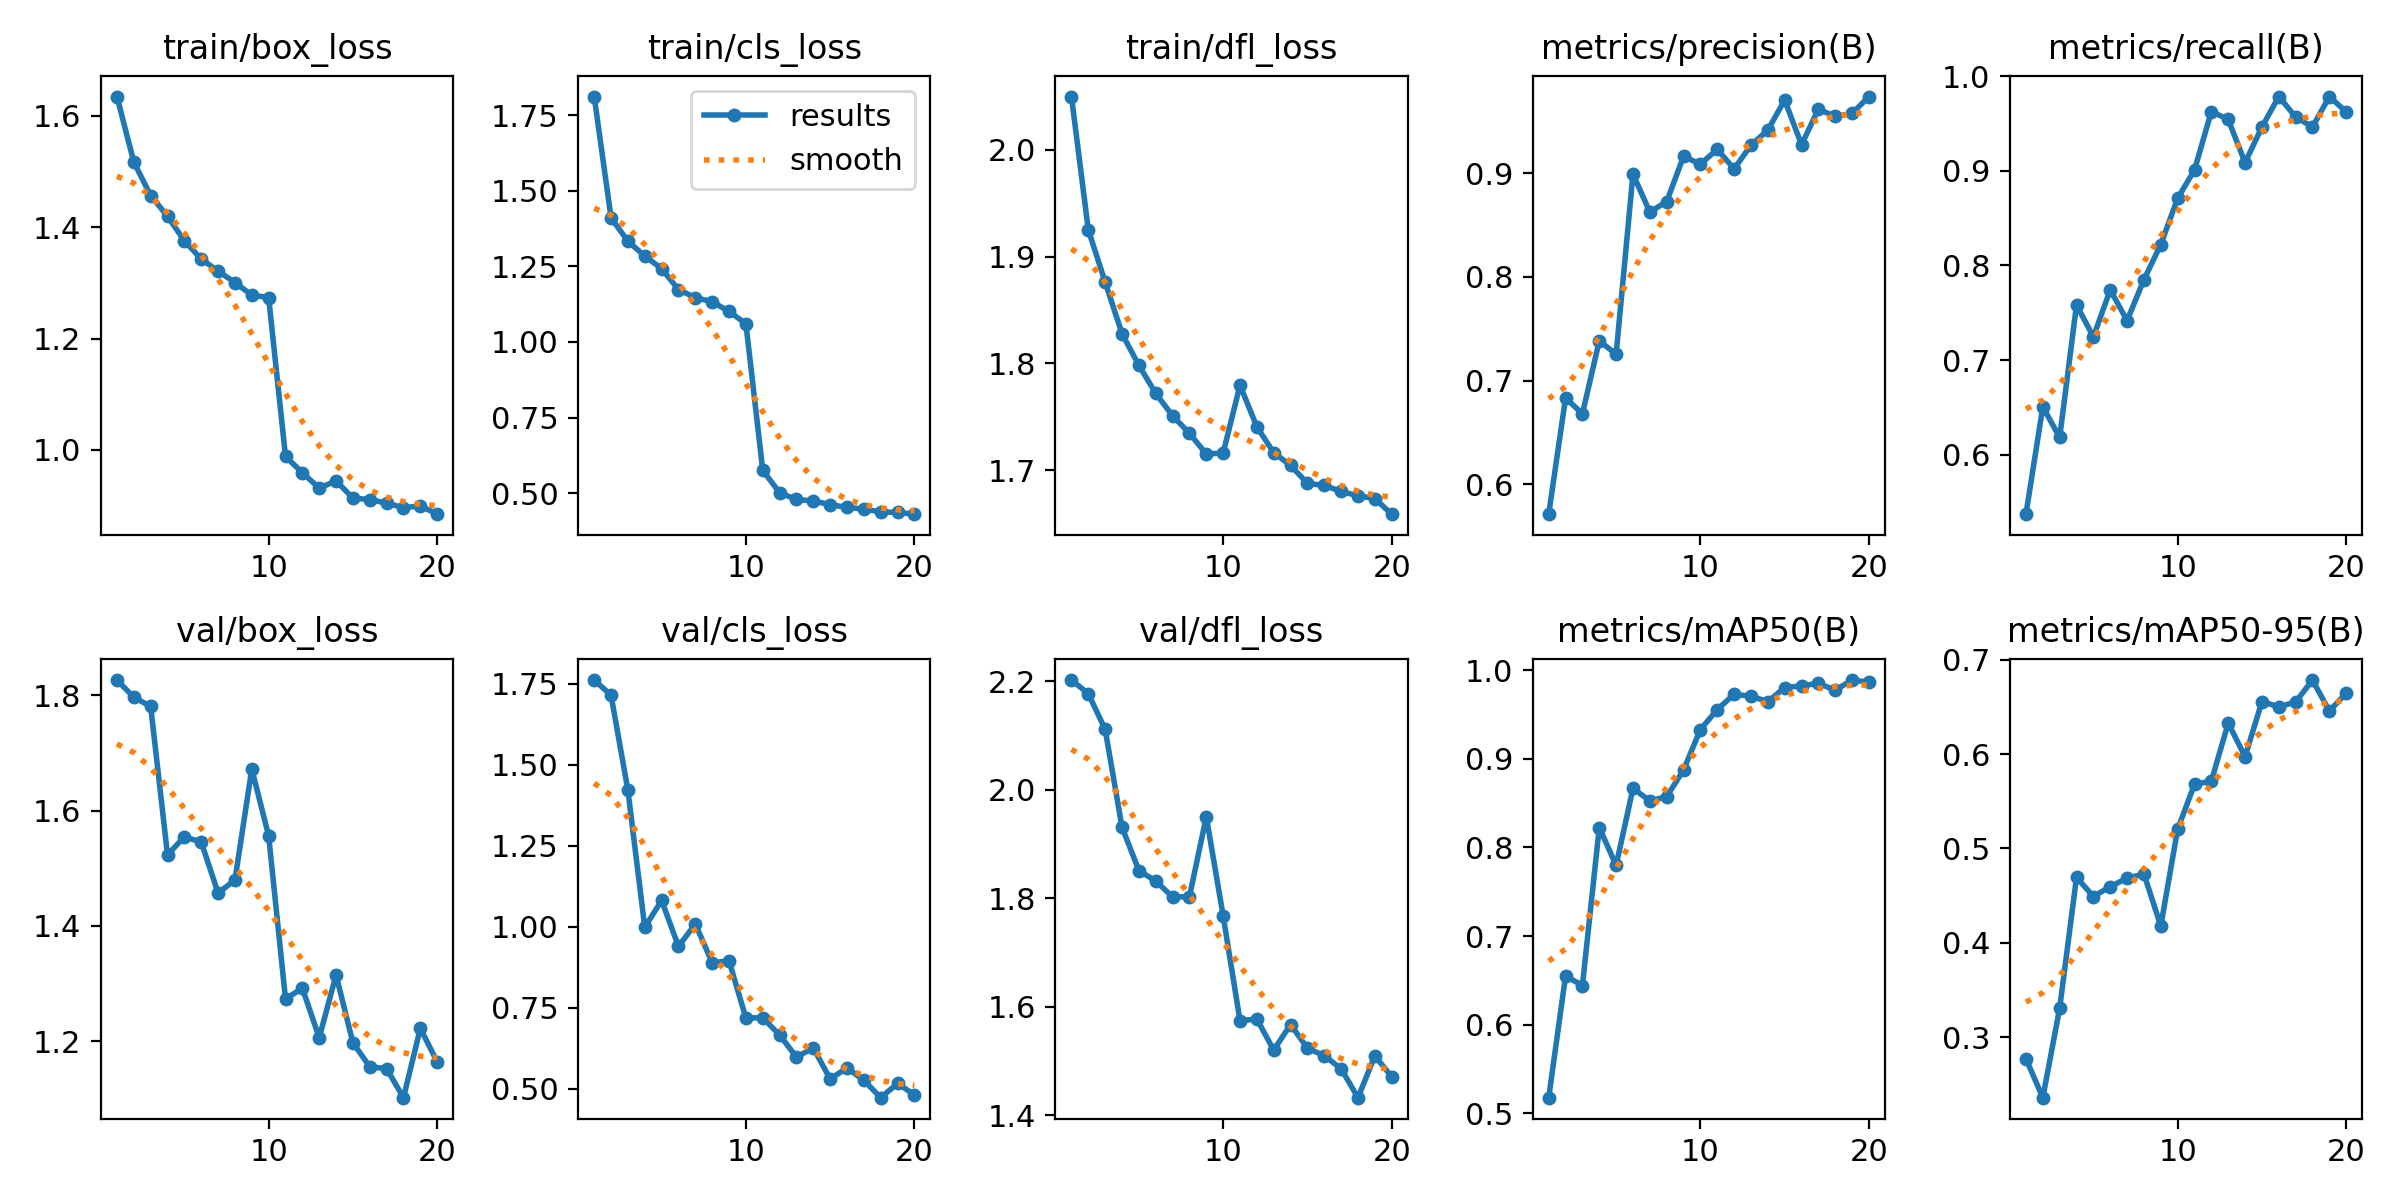

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/yolo_results/pose_training/results.png')

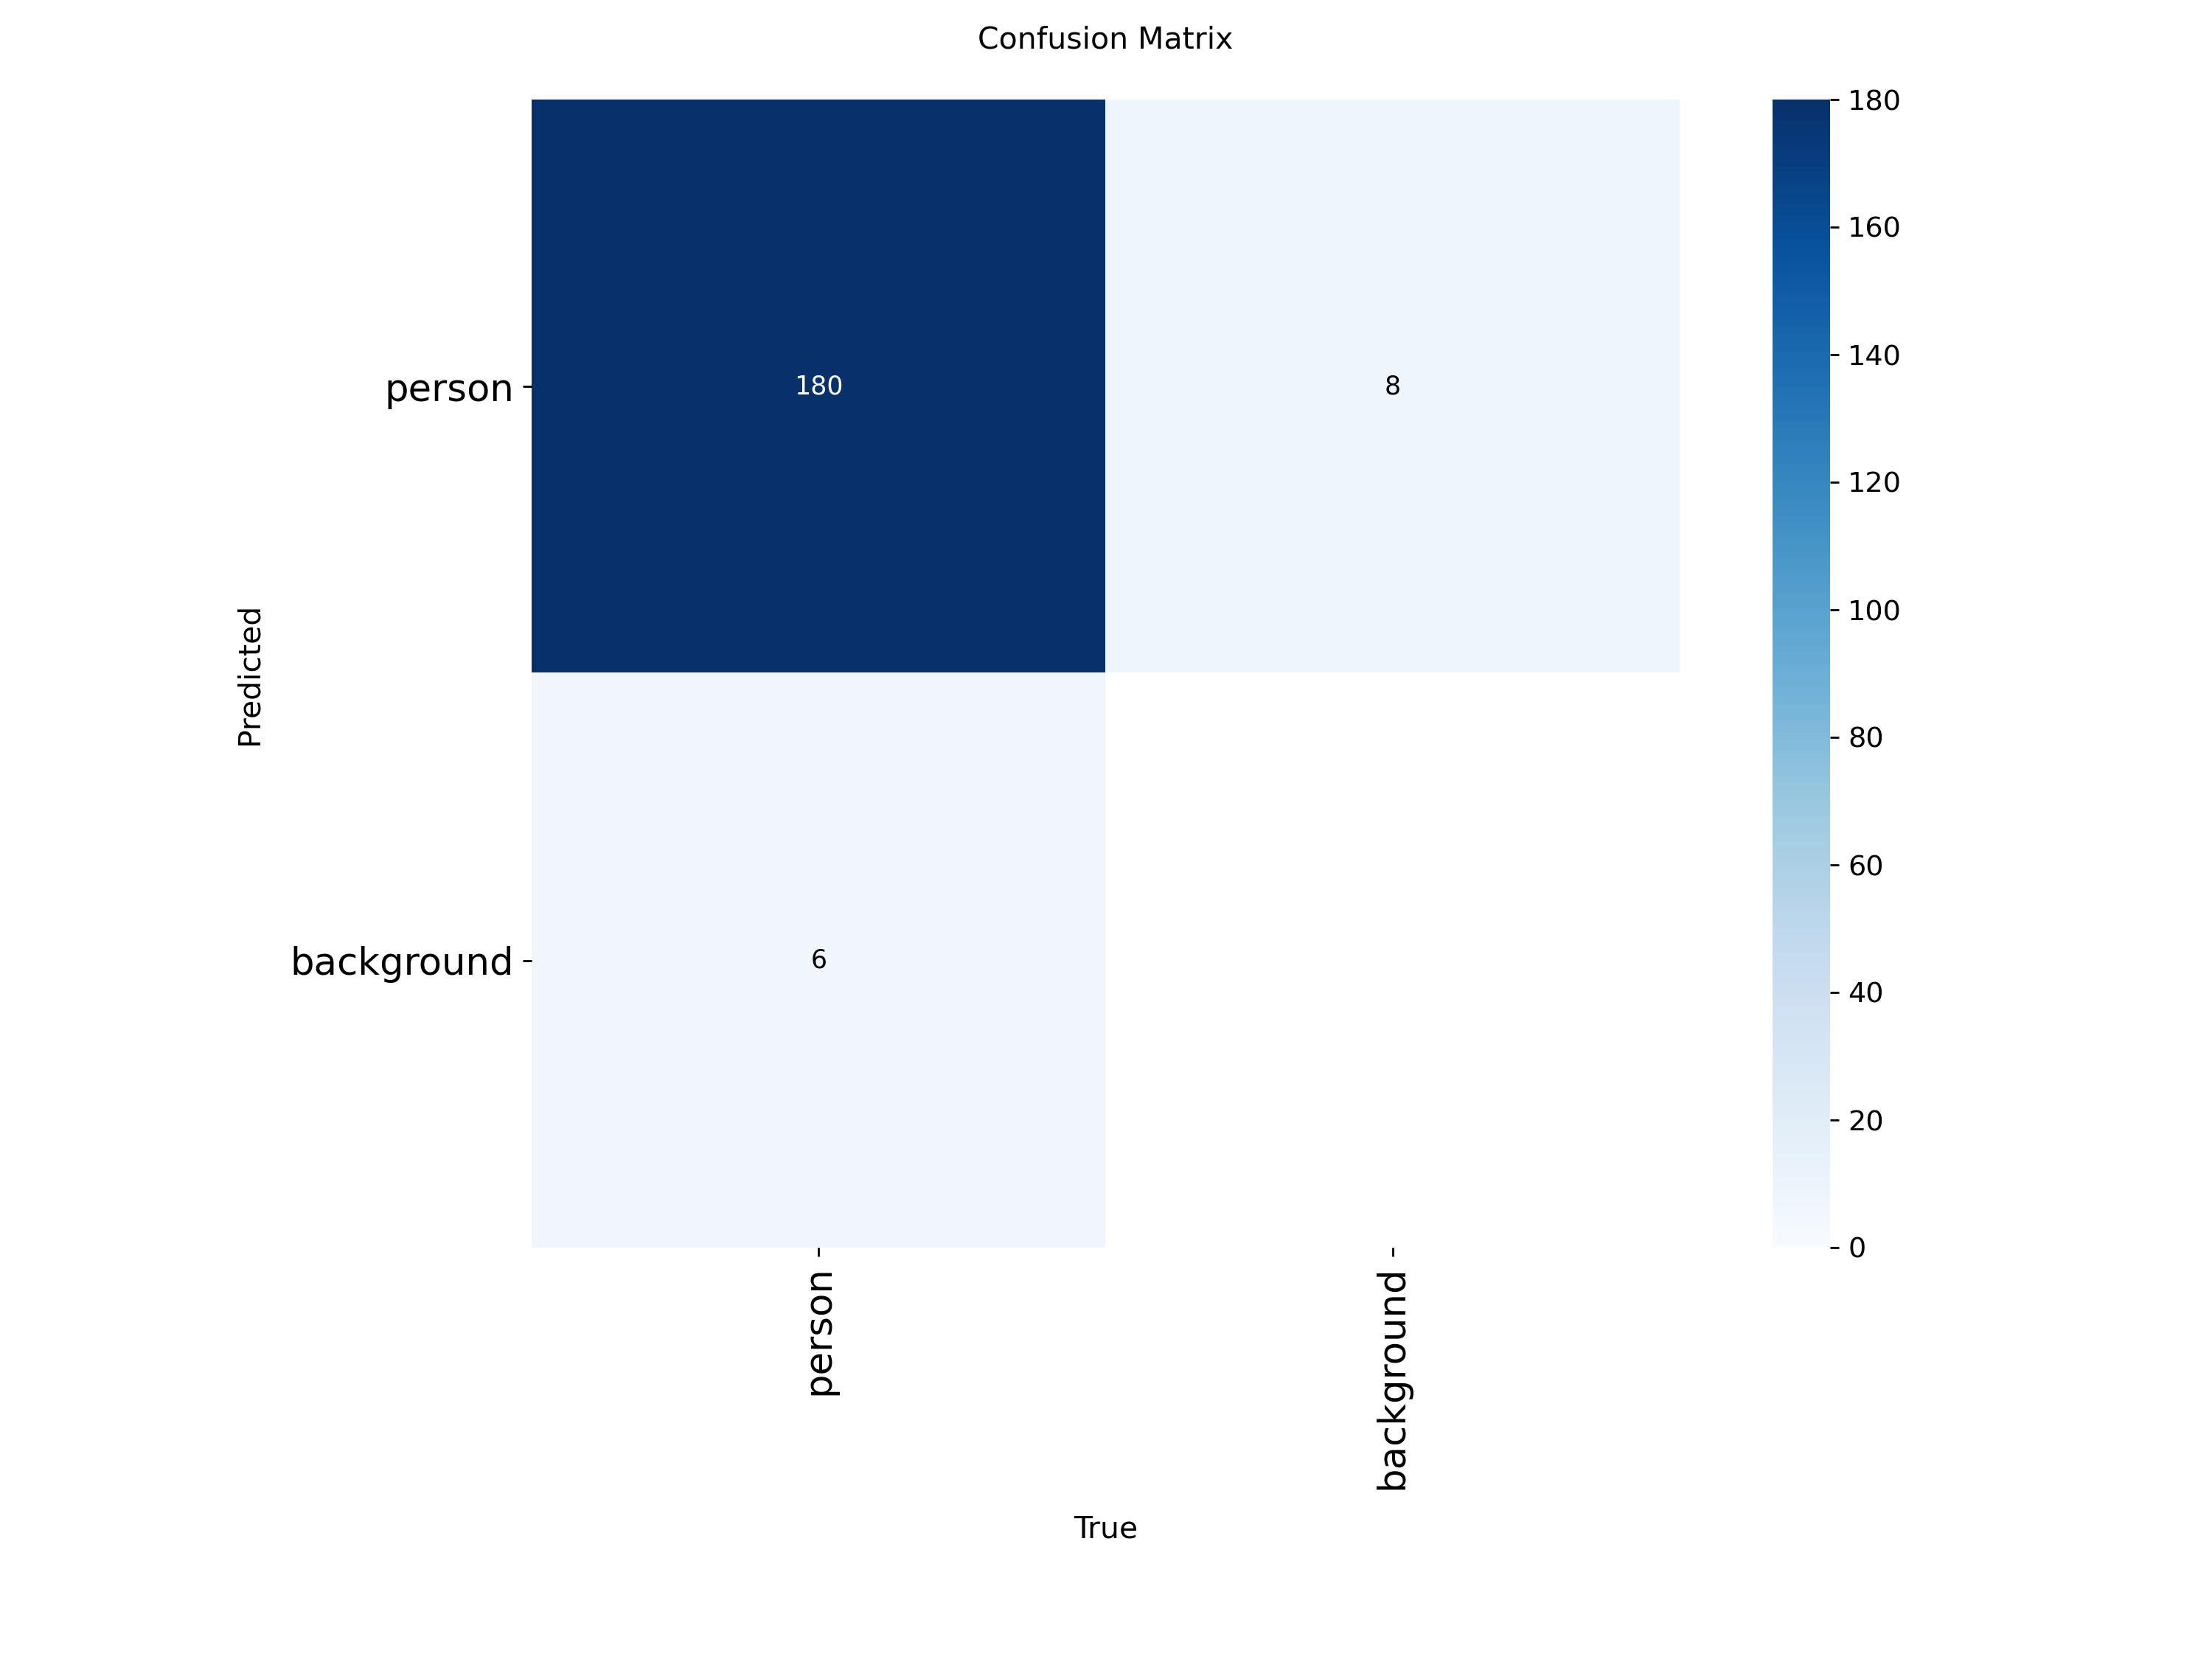

In [ ]:
Image(filename='/content/drive/MyDrive/yolo_results/pose_training/confusion_matrix.png')

## ᯓᰔ Result from a self-trained model

In [ ]:
!yolo detect predict \
  model=/content/drive/MyDrive/yolo_results/pose_training/weights/best.pt \
  source = /content/drive/MyDrive/Test/CP.JPG \
  save=True \
  project=/content/drive/MyDrive/CP461/project/test/inference \
  name=exp1

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/Test/CP.JPG: 640x640 2 persons, 16.2ms
Speed: 3.5ms preprocess, 16.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/CP461/project/test/inference/exp12
💡 Learn more at https://docs.ultralytics.com/modes/predict


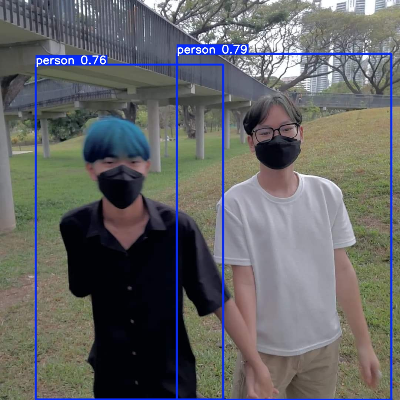

In [ ]:
img_path = '/content/drive/MyDrive/CP461/project/test/inference/exp110/CP.jpg'

yolo_img_1 = cv2.imread(img_path)

    max_width = 400
    h, w = yolo_img_1.shape[:2]
    if w > max_width:
        scale = max_width / w
        new_size = (int(w*scale), int(h*scale))
        yolo_img_1 = cv2.resize(yolo_img_1, new_size)

    cv2_imshow(yolo_img_1)


## ᯓᰔ Result from an existing person class

In [ ]:
model = YOLO("yolov8s.pt")


image 1/1 /content/drive/MyDrive/Test/CP.JPG: 640x640 2 persons, 16.5ms
Speed: 2.9ms preprocess, 16.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


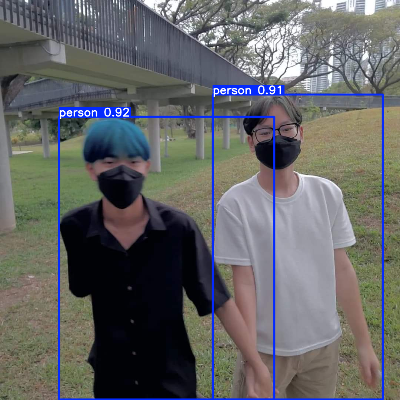

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

results = model("/content/drive/MyDrive/Test/CP.JPG", classes=[0])
yolo_img_2 = results[0].plot()  # returns np.array

max_width = 400
h, w = yolo_img_2.shape[:2]
if w > max_width:
    scale = max_width / w
    new_size = (int(w*scale), int(h*scale))
    yolo_img_2 = cv2.resize(yolo_img_2, new_size)

cv2_imshow(yolo_img_2)

## Compare

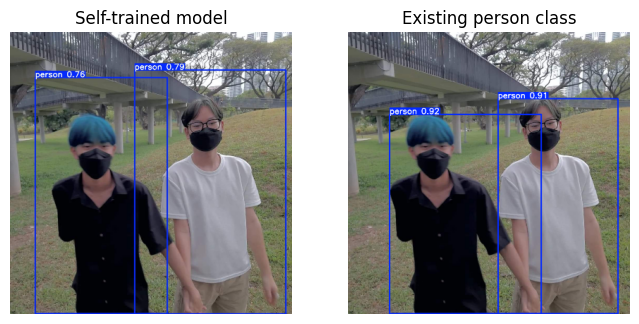

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))  # 1 แถว 2 คอลัมน์

axs[0].imshow(cv2.cvtColor(yolo_img_1, cv2.COLOR_BGR2RGB))
axs[0].set_title("Self-trained model")
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(yolo_img_2, cv2.COLOR_BGR2RGB))
axs[1].set_title("Existing person class")
axs[1].axis('off')

plt.show()

# ˖⋆˚✿˖° Training YOLO11

In [ ]:
!yolo detect train data=/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/data.yaml \
    model=yolo11s.pt epochs=100 project=/content/drive/MyDrive/yolo_results name=pose_training

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/AI_Exercise_Pose_Feedback/yolov5_onlyPerson/person/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

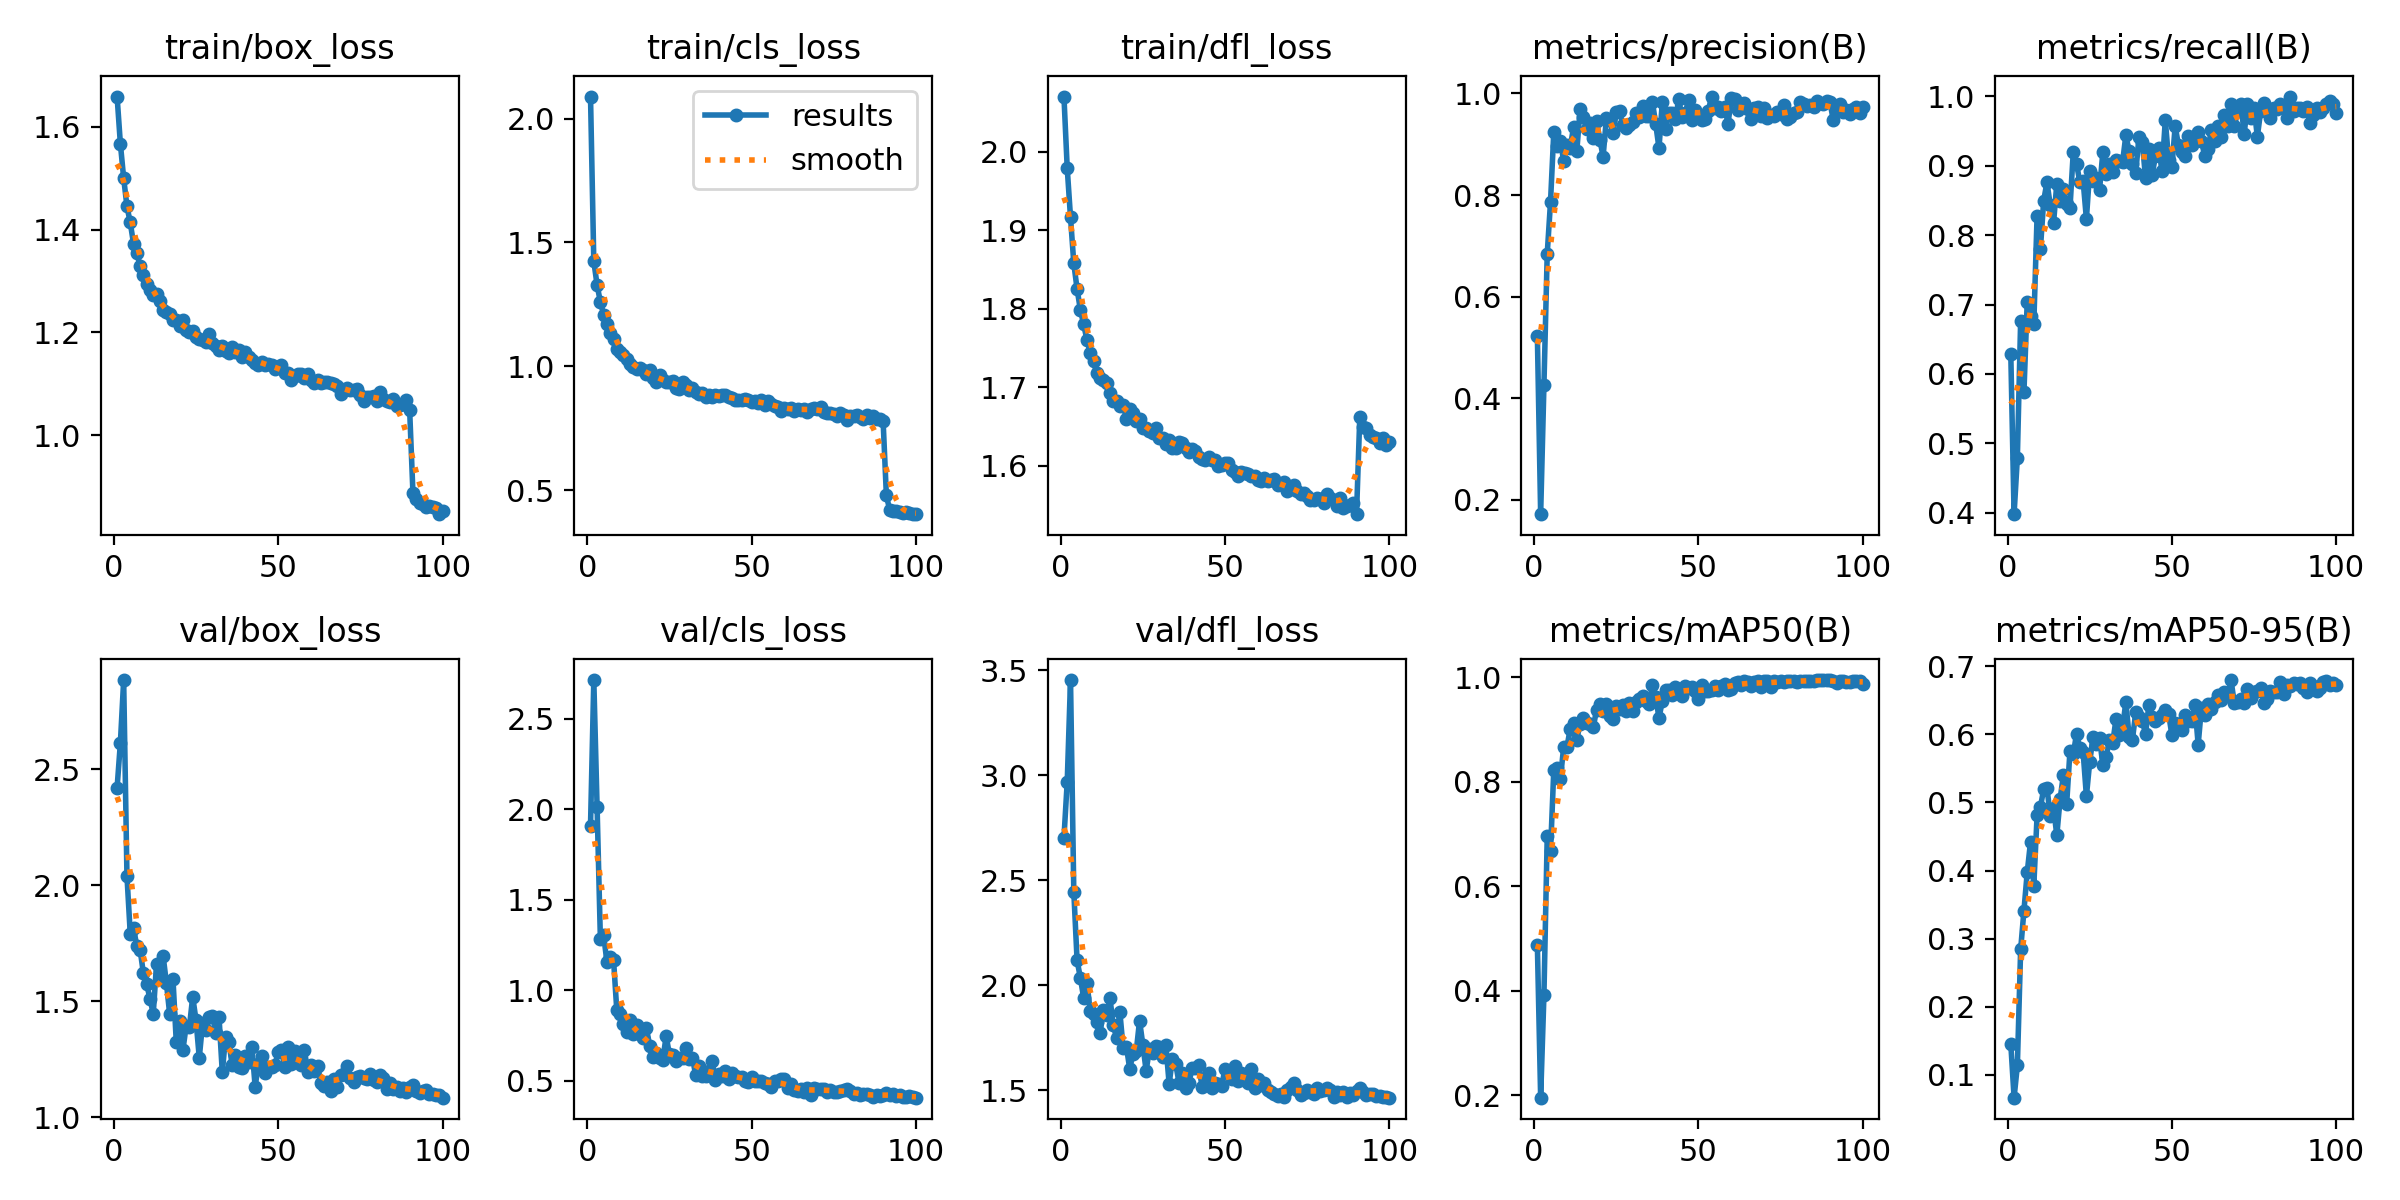

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/yolo_results/pose_training/results.png')

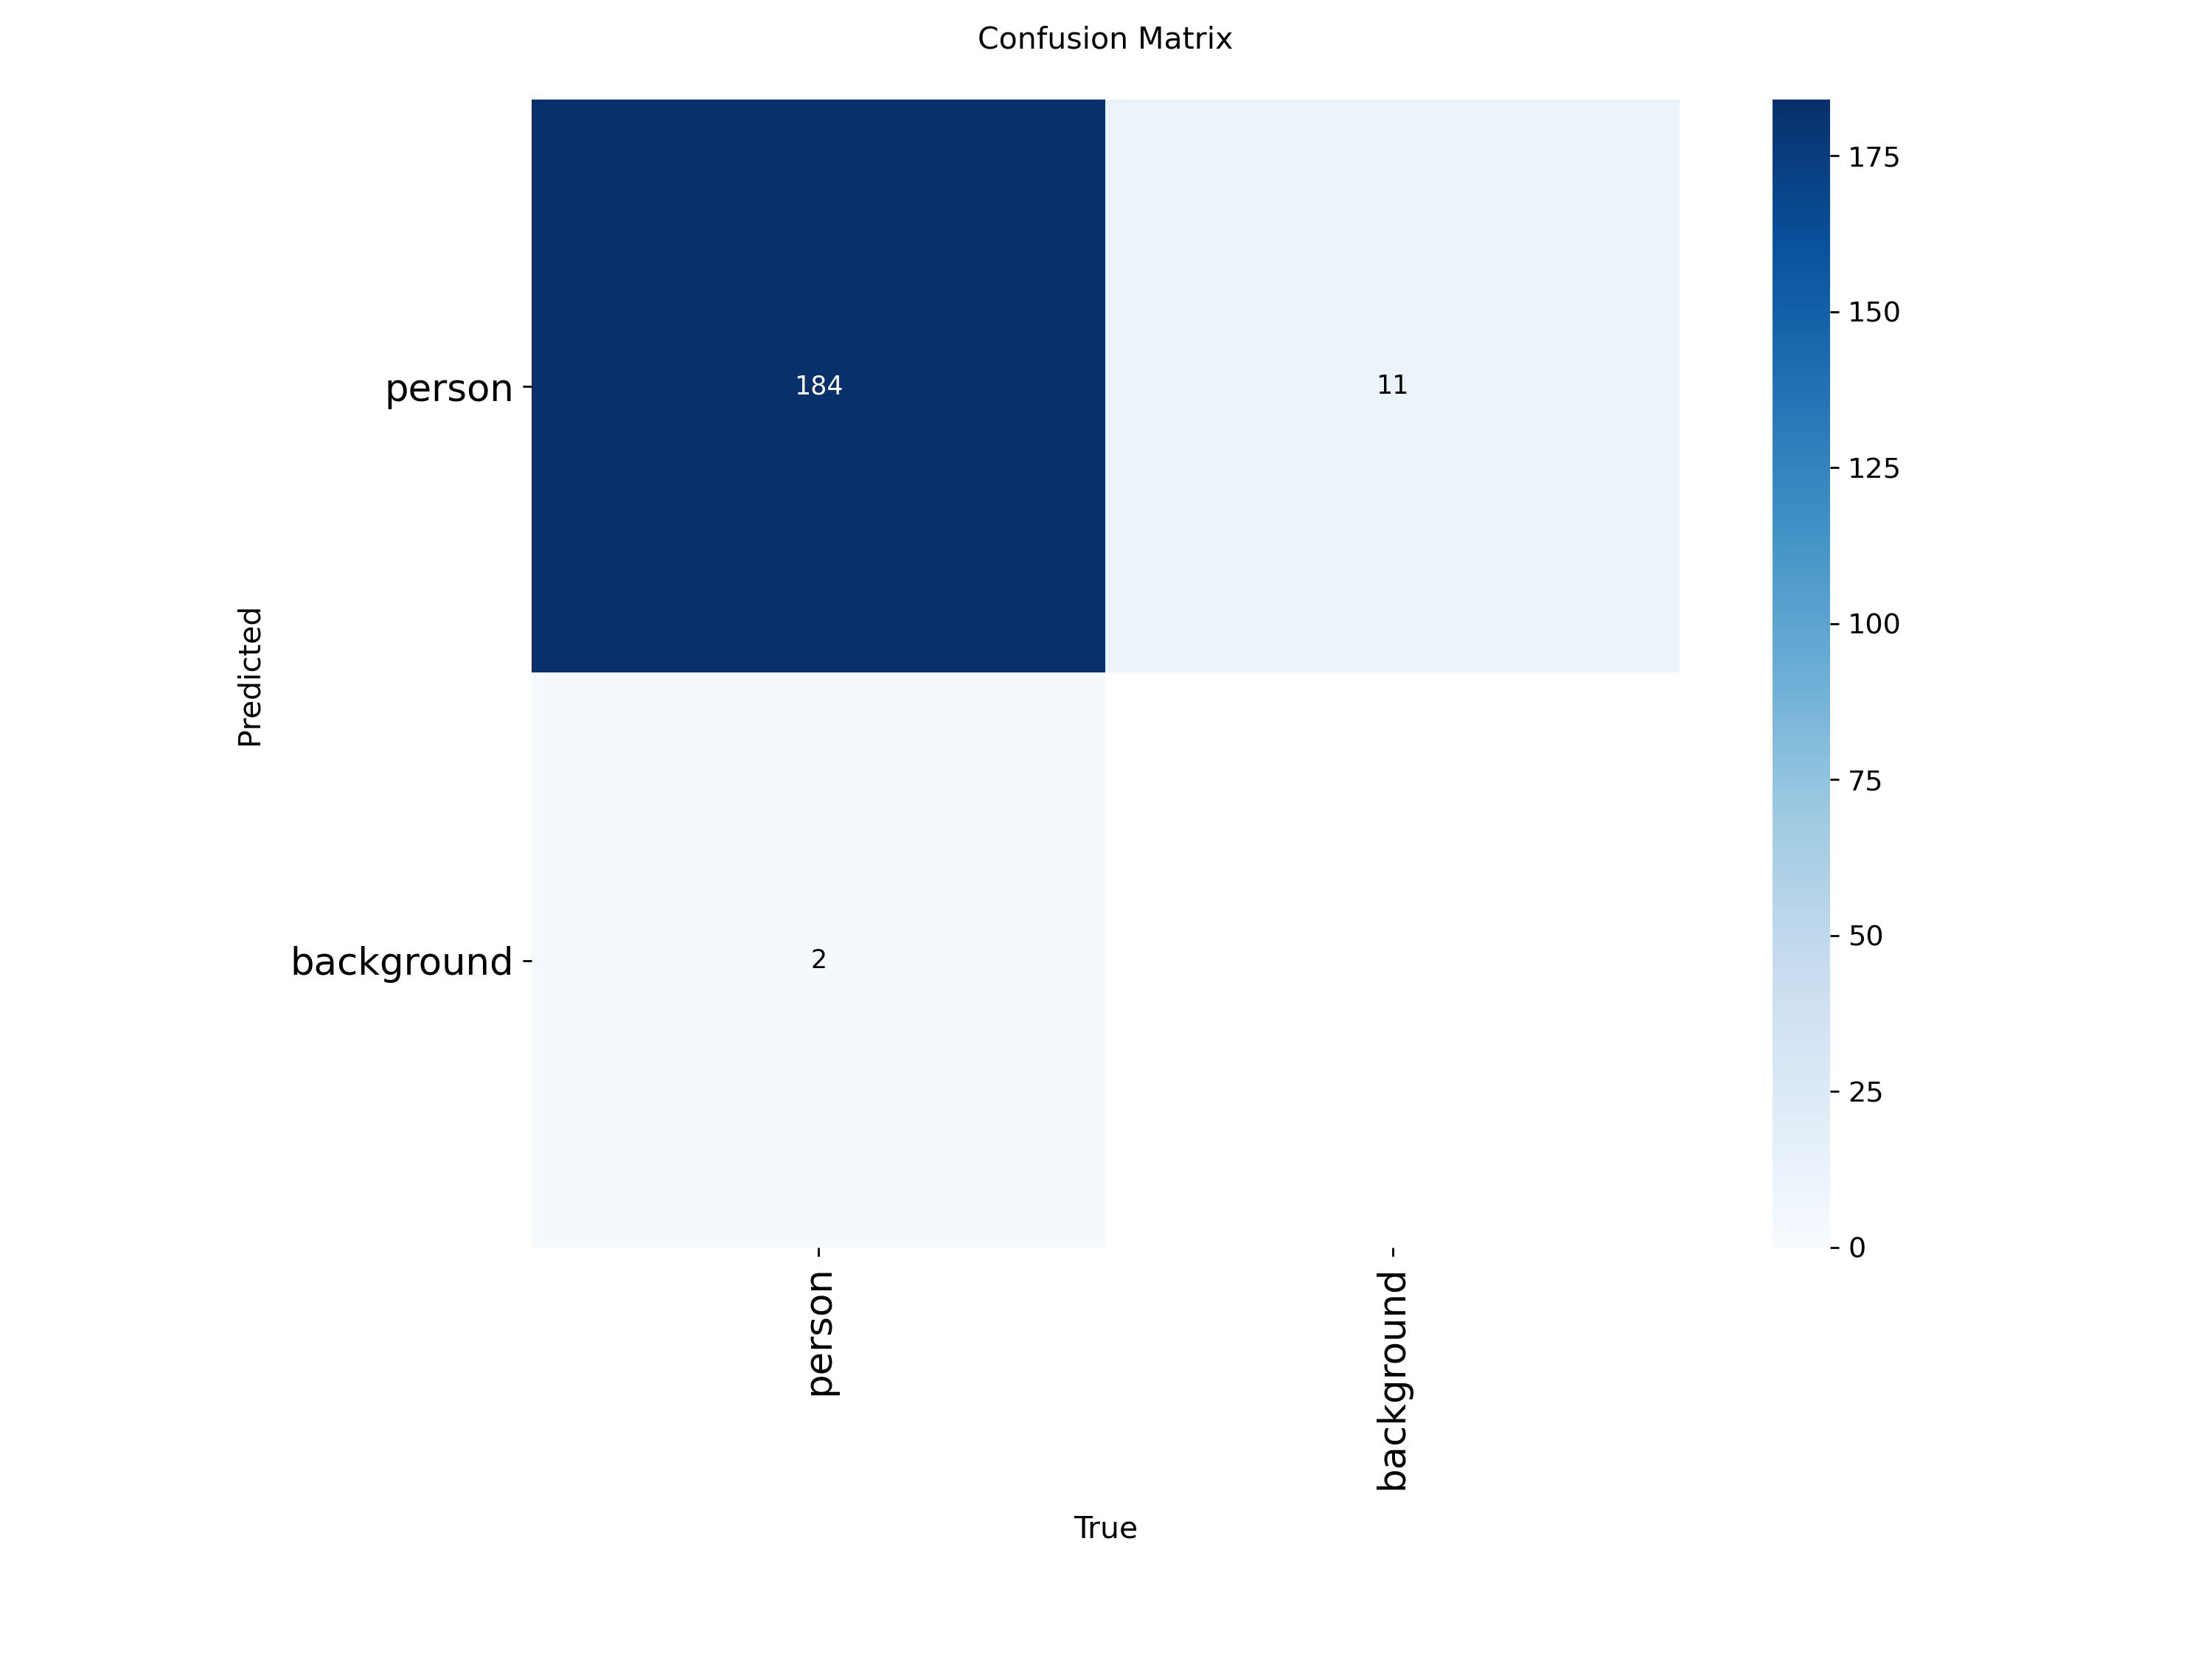

In [ ]:
Image(filename='/content/drive/MyDrive/yolo_results/pose_training/confusion_matrix.png')

ไฟล์ [best.pt](https://drive.google.com/file/d/1gMXcGh4fuKvHKiOdOf7KCvqUhfh6nnj8/view?usp=sharing)

## ᯓᰔ Result from a self-trained model

In [ ]:
!yolo detect predict \
  model=/content/drive/MyDrive/yolo_results/pose_training/weights/best.pt \
  source=/content/drive/MyDrive/CP461/project/test_film/filmAmy.jpg \
  save=True \
  project=/content/drive/MyDrive/CP461/project/test_film/inference \
  name=exp1

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/drive/MyDrive/CP461/project/test_film/filmAmy.jpg: 640x384 3 persons, 542.8ms
Speed: 5.8ms preprocess, 542.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to /content/drive/MyDrive/CP461/project/test_film/inference/exp110
💡 Learn more at https://docs.ultralytics.com/modes/predict


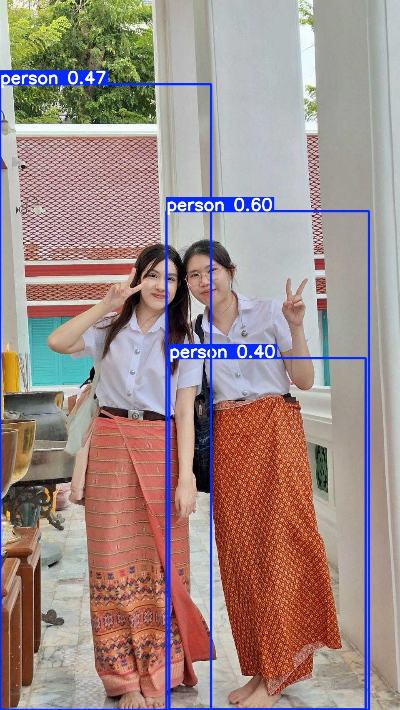

In [ ]:
img_path = '/content/drive/MyDrive/CP461/project/test_film/inference/exp110/filmAmy.jpg'
yolo_img_1 = cv2.imread(img_path)

max_width = 400
h, w = yolo_img_1.shape[:2]
if w > max_width:
    scale = max_width / w
    new_size = (int(w*scale), int(h*scale))
    yolo_img_1 = cv2.resize(yolo_img_1, new_size)

cv2_imshow(yolo_img_1)

## ᯓᰔ Result from an existing person class

In [ ]:
model = YOLO("yolo11n.pt")


image 1/1 /content/drive/MyDrive/CP461/project/test_film/filmAmy.jpg: 640x384 2 persons, 147.9ms
Speed: 2.9ms preprocess, 147.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


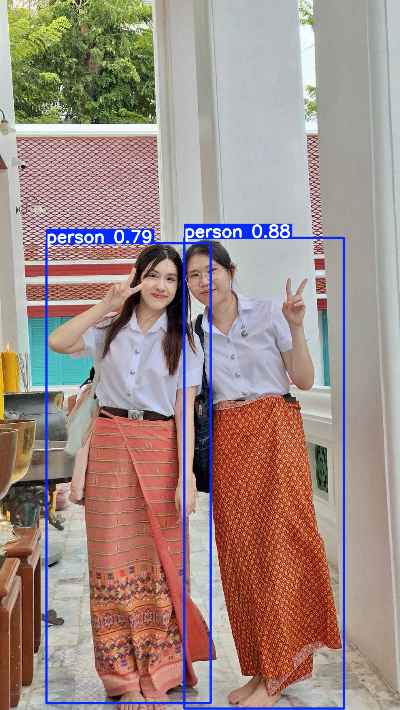

In [ ]:
results = model("/content/drive/MyDrive/CP461/project/test_film/filmAmy.jpg", classes=[0])
yolo_img_2 = results[0].plot()  # returns np.array

max_width = 400
h, w = yolo_img_2.shape[:2]
if w > max_width:
    scale = max_width / w
    new_size = (int(w*scale), int(h*scale))
    yolo_img_2 = cv2.resize(yolo_img_2, new_size)

cv2_imshow(yolo_img_2)

## Compare

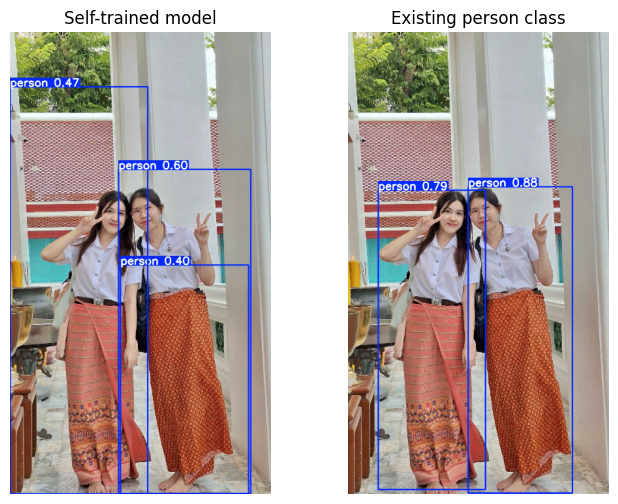

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))  # 1 แถว 2 คอลัมน์

axs[0].imshow(cv2.cvtColor(yolo_img_1, cv2.COLOR_BGR2RGB))
axs[0].set_title("Self-trained model")
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(yolo_img_2, cv2.COLOR_BGR2RGB))
axs[1].set_title("Existing person class")
axs[1].axis('off')

plt.show()